# Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Name:-Darpan Relan

# Project Name:-Customer Segmentation

# Institute Name:-Board Infinity

# Submitted To:-Mr. Shrikant

## Importing Libraries & Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## IMPORTING data

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.shape

(200, 5)

## finding null values

In [6]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## data visualization

In [7]:
plt.style.use('fivethirtyeight')

<function matplotlib.pyplot.show(*args, **kw)>

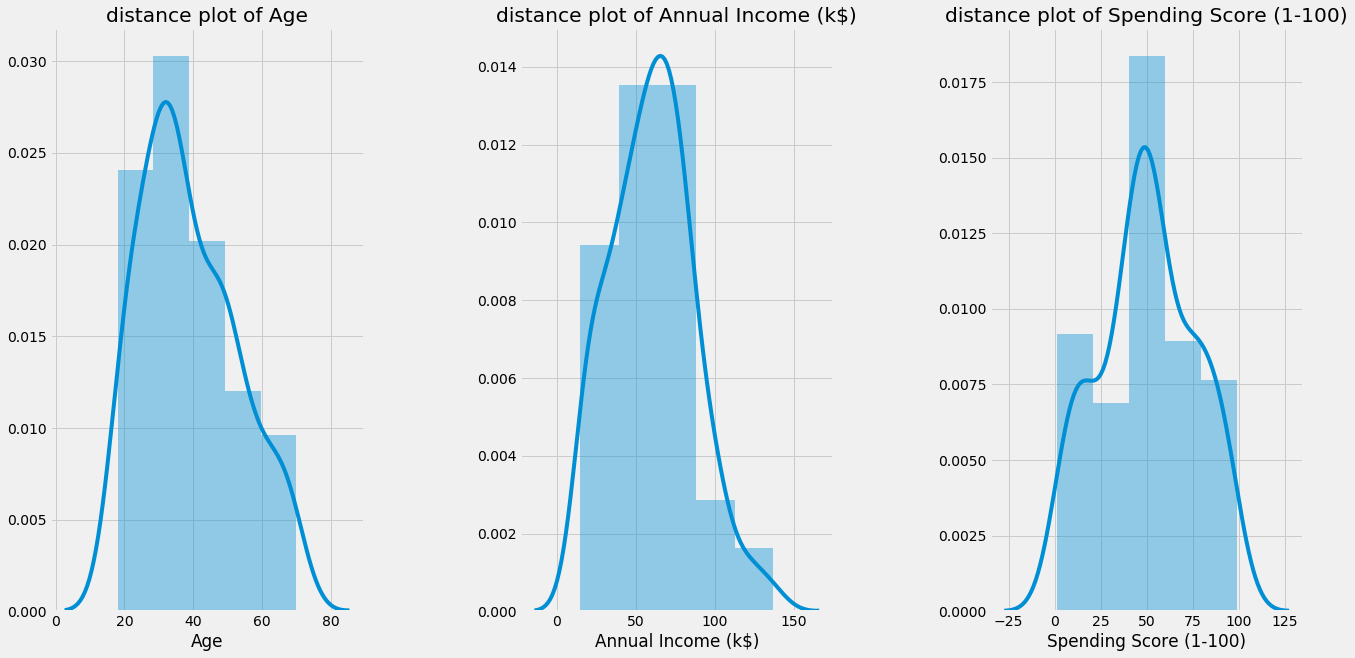

In [8]:
plt.figure(1,figsize=(20,10))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],bins=5)
    plt.title('distance plot of {}'.format(x))
plt.show    

<function matplotlib.pyplot.show(*args, **kw)>

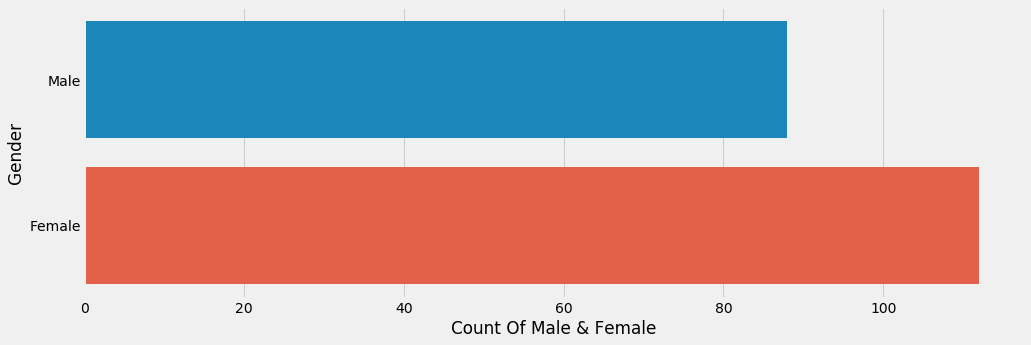

In [9]:
plt.figure(1,figsize=(15,5))
sns.countplot(y='Gender',data=data)
plt.xlabel('Count Of Male & Female')
plt.show

## plotting the relation between age, annual income and spending score

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

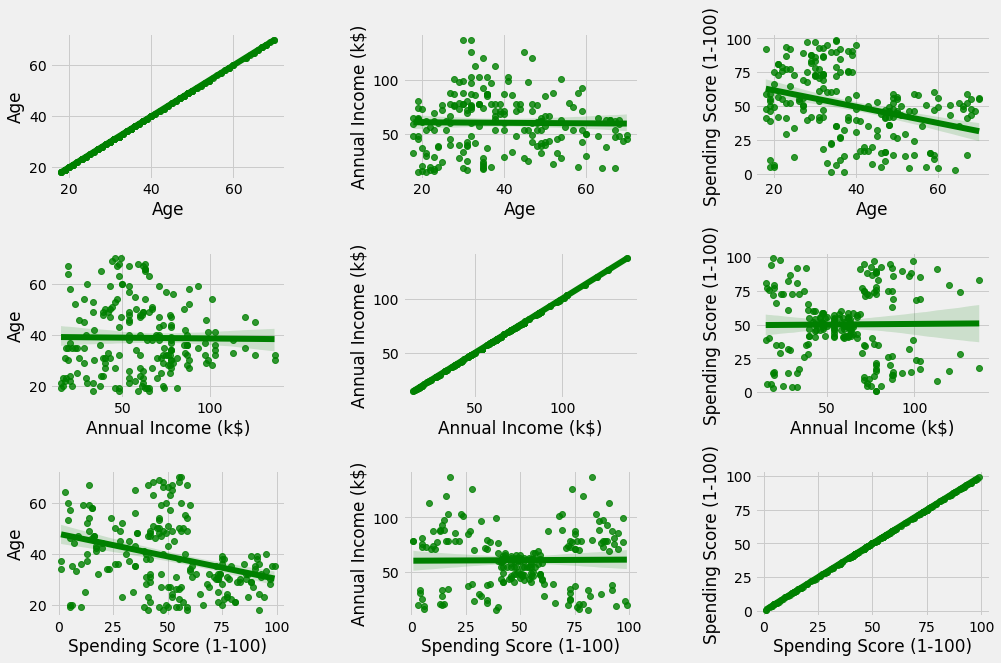

In [10]:
plt.figure(1,figsize=(15,10))
n=0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=data,color='g')
plt.plot        

<function matplotlib.pyplot.show(*args, **kw)>

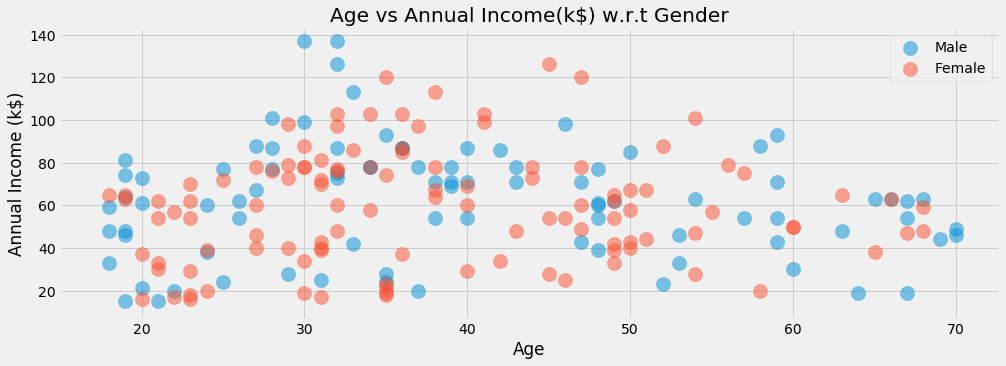

In [11]:
plt.figure(1,figsize=(15,5))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=data[data['Gender']==gender],s=200,alpha=0.5,label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income(k$) w.r.t Gender')
plt.legend()
plt.show

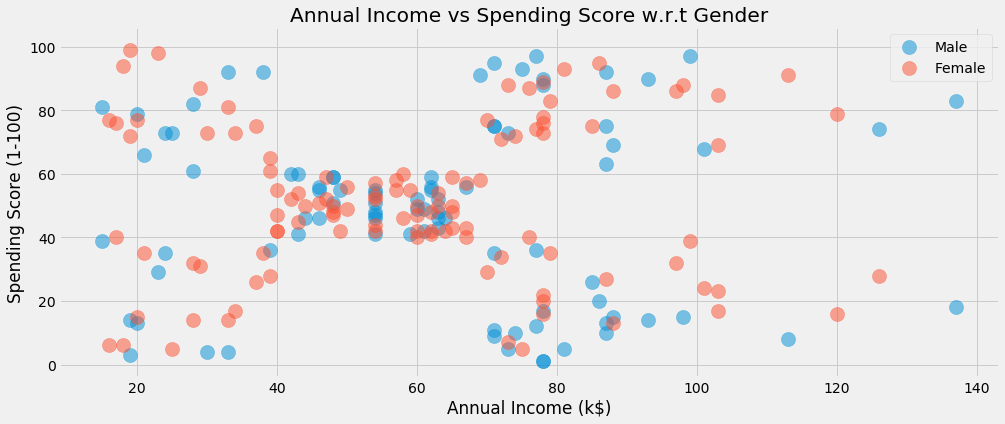

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

## as we see the pattern in it so clustering would be better annual income and spending score

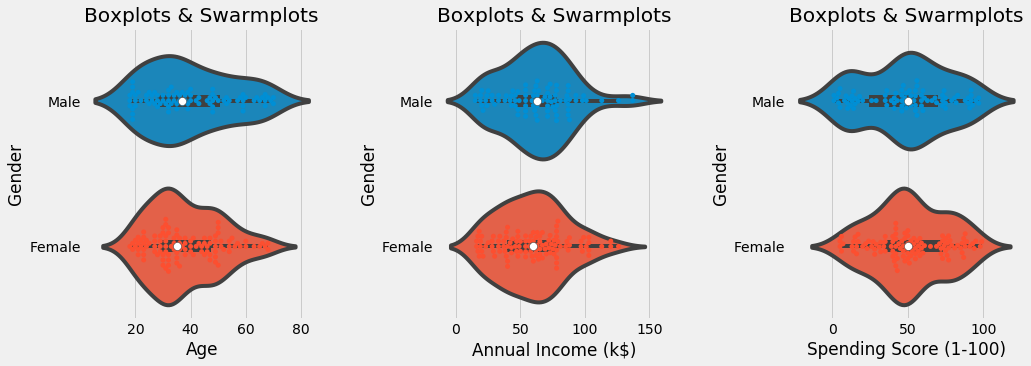

In [13]:
plt.figure(1,figsize=(15,5))
n=0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.swarmplot(x=cols,y='Gender',data=data)
    sns.violinplot(x=cols,y='Gender',data=data)
    plt.ylabel('Gender')
    plt.title('Boxplots & Swarmplots')
plt.show()    

## clustering using k means

## now finding the best n clusters using elbow method

In [14]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [15]:
x1 = data[['Age' , 'Spending Score (1-100)','Annual Income (k$)']].iloc[: , :].values
x1

array([[ 19,  39,  15],
       [ 21,  81,  15],
       [ 20,   6,  16],
       [ 23,  77,  16],
       [ 31,  40,  17],
       [ 22,  76,  17],
       [ 35,   6,  18],
       [ 23,  94,  18],
       [ 64,   3,  19],
       [ 30,  72,  19],
       [ 67,  14,  19],
       [ 35,  99,  19],
       [ 58,  15,  20],
       [ 24,  77,  20],
       [ 37,  13,  20],
       [ 22,  79,  20],
       [ 35,  35,  21],
       [ 20,  66,  21],
       [ 52,  29,  23],
       [ 35,  98,  23],
       [ 35,  35,  24],
       [ 25,  73,  24],
       [ 46,   5,  25],
       [ 31,  73,  25],
       [ 54,  14,  28],
       [ 29,  82,  28],
       [ 45,  32,  28],
       [ 35,  61,  28],
       [ 40,  31,  29],
       [ 23,  87,  29],
       [ 60,   4,  30],
       [ 21,  73,  30],
       [ 53,   4,  33],
       [ 18,  92,  33],
       [ 49,  14,  33],
       [ 21,  81,  33],
       [ 42,  17,  34],
       [ 30,  73,  34],
       [ 36,  26,  37],
       [ 20,  75,  37],
       [ 65,  35,  38],
       [ 24,  92

In [16]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(x1) 
    kmeanModel.fit(x1)     
      
    distortions.append(sum(np.min(cdist(x1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / x1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / x1.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
mapping2    

{1: 308812.78,
 2: 212840.16982097187,
 3: 143342.751571706,
 4: 104366.15145556198,
 5: 75350.77917248775,
 6: 58300.44332159069,
 7: 51082.54296792137,
 8: 44312.46881207722,
 9: 40588.921495411836,
 10: 37481.2641914347}

In [17]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 35.5832677310801
2 : 30.11722673262042
3 : 24.013910603806483
4 : 20.468250917276343
5 : 17.764541099376498
6 : 15.438839453968932
7 : 14.568820226332402
8 : 13.839901008950148
9 : 13.266608842967342
10 : 12.736585282561713


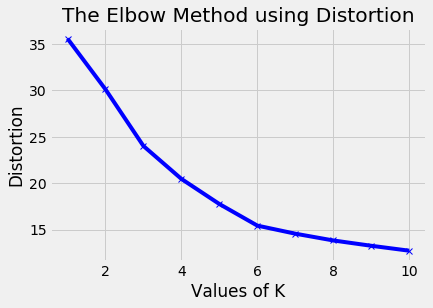

In [18]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

## by seeing distortion we got that 5 is the best value for k means ckluster 

## 1.Segmentation using Age and Spending Score 

In [19]:
x1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 5 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

inertia

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23839.262483341663,
 19693.224937088657,
 15514.19313435103,
 13054.172145982673,
 11520.34610781251,
 10168.277083982011]

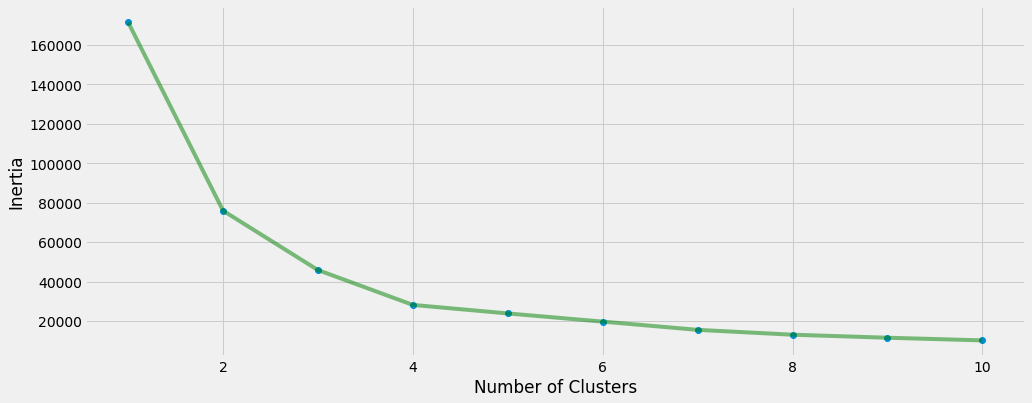

In [20]:

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5,c='g')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [21]:
algorithm = (KMeans(n_clusters = 5,init='k-means++', n_init = 5 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

centroids1
pd.DataFrame(labels1)

,0
0,0
1,1
2,4
3,1
4,0
...,...
195,1
196,2
197,1
198,4


In [22]:
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([4, 4, 4, ..., 1, 1, 1])

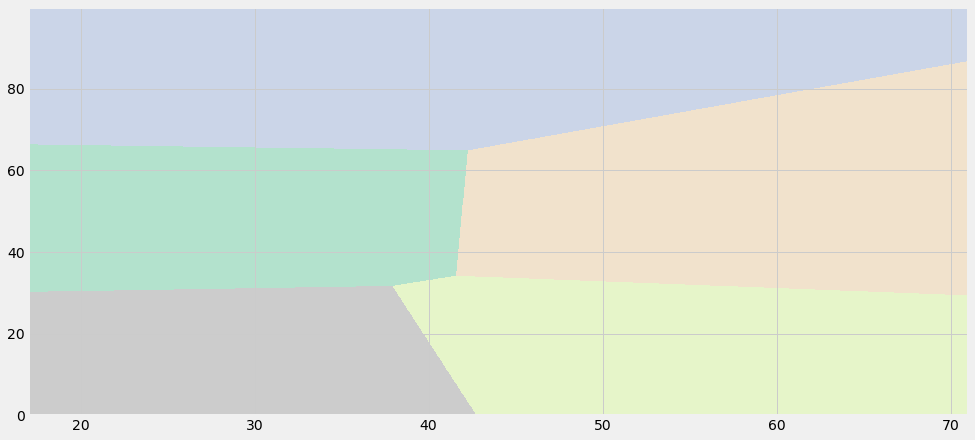

In [23]:

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')


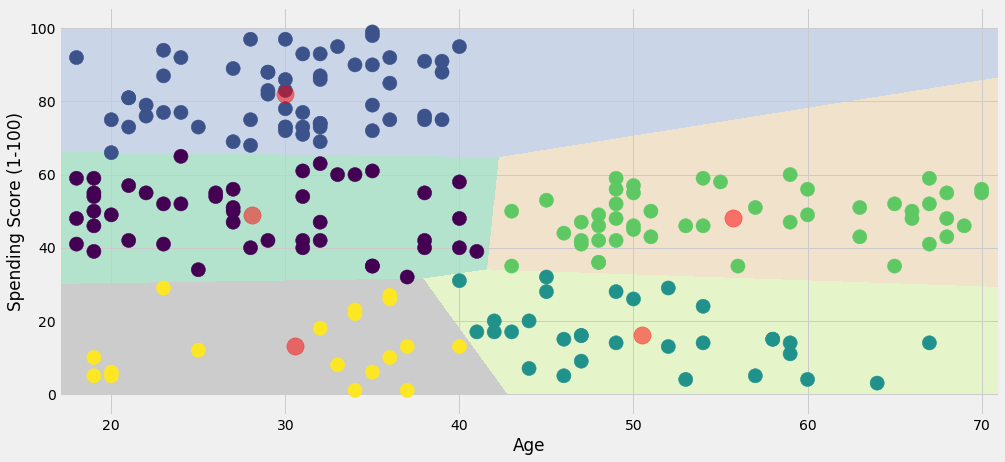

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [25]:
'''Annual Income and spending Score'''
X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)


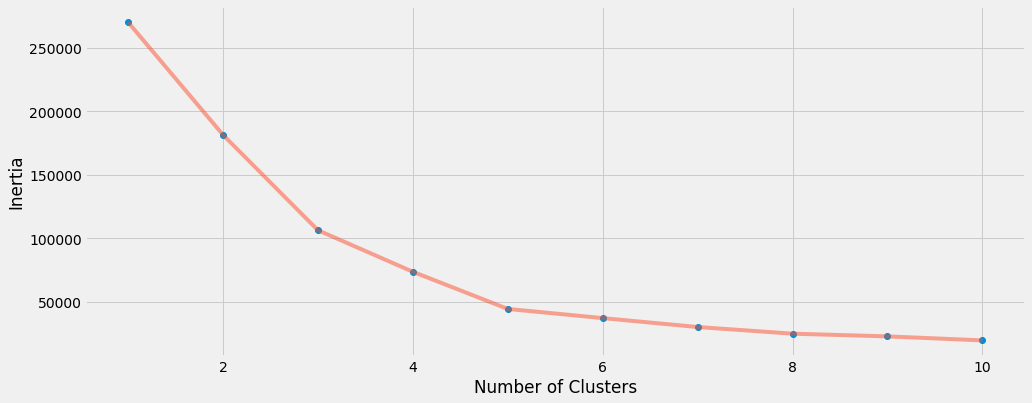

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_


In [28]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 



## K Means Clustering Classification  

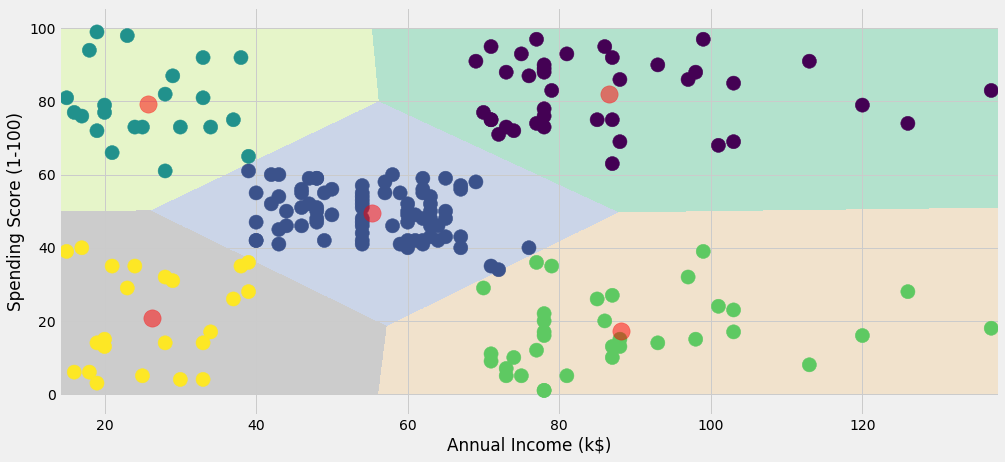

In [29]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

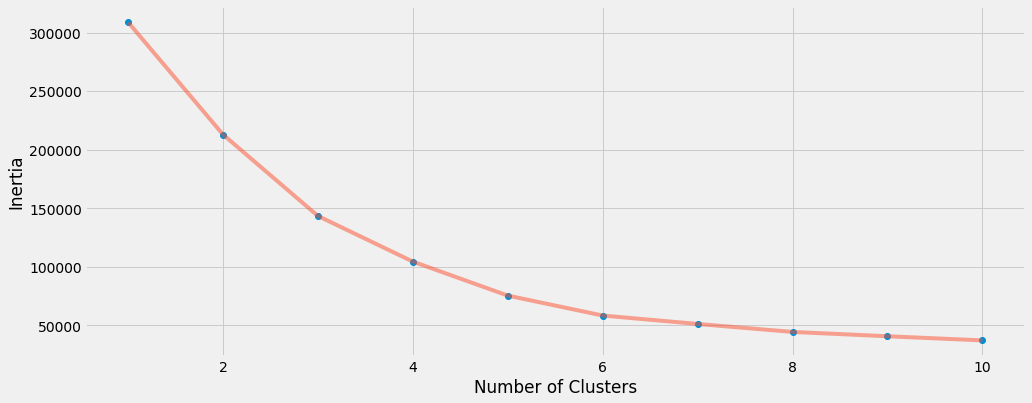

In [30]:
X3 = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)





plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()





algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_


In [9]:
import pickle

In [32]:
pickle.dump(algorithm,open('model.pkl','wb'))



array([4])

In [10]:
model=pickle.load(open('model.pkl','rb'))
model.predict([[20,3,7]])

array([4])

In [ ]:
from flask import Flask,request,jsonify,render_template
app=Flask(__name__)
model=pickle.load(open('model.pkl','rb'))
debug=True
@app.route('/')
def home():
    #return render_template('index')
    return render_template('index.html')
#@app.route('/predict',methods=['POST','GET'])
@app.route('/predict',methods=['POST'])
def predict():
    #print(request.form)
    int_features=[int(x) for x in request.form.values()]
    final_features=[np.array(int_features)]
    prediction=model.predict(final_features)
    
    output=prediction[0]
    
    #return render_template('index',prediction_text='Marketimg Team Needs To contact this person by this strategy {}'.format(output))
    return render_template('index.html',prediction_text='Marketimg Team Needs To contact this person by this strategy {}'.format(output))

if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/May/2020 19:53:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2020 19:53:55] "POST /predict HTTP/1.1" 200 -
